## Web Crawl
-- Crawl popular web forums and news outlets.
-- Collect data from pages.
-- Clean to fead to the sentiment anlysis and visualization.

In [ ]:
# import requests
# from bs4 import BeautifulSoup

# def get_headlines():
#     # turn this into a list/structure in the future
#     # replace with api calls for longevity?
#     url = "https://www.bbc.com/news"
#     response = requests.get(url)
#     soup = BeautifulSoup(response.text, "html.parser")

#     #scrape h2 and h3 
#     h2Headlines = [h.get_text() for h in soup.find_all("h2")]
#     h3Headlines = [h.get_text() for h in soup.find_all("h3")]

#     #add to one list
#     headlines = h2Headlines + h3Headlines
#     return headlines

# print(get_headlines())

import requests
from bs4 import BeautifulSoup

def get_headlines(urls):
    all_headlines = []
    for url in urls:
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise error for bad responses
            soup = BeautifulSoup(response.text, "html.parser")

            h2Headlines = [h.get_text().strip() for h in soup.find_all("h2")]
            h3Headlines = [h.get_text().strip() for h in soup.find_all("h3")]

            headlines = h2Headlines + h3Headlines
            all_headlines.extend(headlines)
        except requests.RequestException as e:
            print(f"Failed to get headlines from {url}: {e}")

    return all_headlines

# Example usage
urls = [
    "https://www.bbc.com/news",
    "https://www.cnn.com",
    "https://www.reuters.com",
    "https://www.nytimes.com",
    "https://www.theguardian.com/international",
    "https://www.aljazeera.com",
    "https://www.foxnews.com",
    "https://www.nbcnews.com",
    "https://www.washingtonpost.com",
    "https://www.bloomberg.com",
    "https://www.cbsnews.com",
    "https://www.npr.org",
    "https://www.wsj.com",
    "https://www.economist.com",
    "https://www.nationalgeographic.com"
]

print(get_headlines(urls))


Failed to get headlines from https://www.reuters.com: 401 Client Error: HTTP Forbidden for url: https://www.reuters.com/
['Ukraine and Russia far apart in direct talks, but prisoner swap agreed', 'Cassie Ventura tells Diddy trial she would give back $20m to undo freak-offs', "I was on a flight - but British Airways told me I wasn't", "How Diddy's lawyers used freak-off texts against Cassie", 'US loses last perfect credit rating amid rising debt', 'Cassie Ventura tells Diddy trial she would give back $20m to undo freak-offs', 'Dizziness from hunger has become a constant, Gazans tell the BBC', "Four obstacles for Republican rebels in Trump's 'big, beautiful' tax bill", "Trump's frantic week of peace brokering hints at what he really wants", "I was on a flight - but British Airways told me I wasn't", 'Ex-FBI boss interviewed by Secret Service over Trump seashell post', 'Eurovision final 2025: Catch up with the top five favourites', "Venezuelan deported from US using gang 'points system', 

## sentiment analysis

In [116]:
from textblob import TextBlob

def stringsToText(list):
    result = ", ".join(list)
    return result


def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

text = stringsToText(get_headlines(urls))

#TextBlob(text).sentiment.polarity returns a sentiment polarity score, which is a number between -1.0 and 1.0 that tells you how positive or negative the text is.
# -1 = negative ; 1 = positive
sentiment = analyze_sentiment(text)

print(sentiment)

Failed to get headlines from https://www.reuters.com: 401 Client Error: HTTP Forbidden for url: https://www.reuters.com/
0.17772714233557607


## Color visualizations

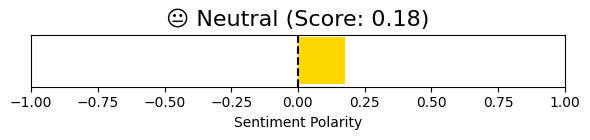

In [117]:
import matplotlib.pyplot as plt

def show_sentiment_bar(score):
    color, label = get_mood_color(score)
    fig, ax = plt.subplots(figsize=(6, 1.5))
    ax.barh(0, score, color=color)
    ax.set_xlim(-1, 1)
    ax.set_title(f"{label} (Score: {score:.2f})", fontsize=16)
    ax.set_yticks([])
    ax.axvline(0, color='black', linestyle='--')
    plt.xlabel("Sentiment Polarity")
    plt.tight_layout()
    plt.show()


show_sentiment_bar(sentiment)


In [118]:
import csv
from datetime import datetime

# Example variables
#avg_score = 0.42
#mood_label = "😊 Happy"

#  Define the timestamp
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

#  Append to CSV file
with open("mood_history.csv", "a", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow([timestamp, avg_score, mood_label])
